# 보스턴 주택 가격 데이터세트(Boston Housing Dataset)
* 13 가지의 데이터를 이용해서 주택가격 예측하기 

In [1]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.datasets import boston_housing

#### 데이터 셋 불러와서 학습 데이터와 테스트 데이터 만들기 
* 학습 데이터 : 404개 - 13가지 
* 테스트 데이터 : 102개 - 1가지 
* 각 데이터는 단위가 다름 - 전처리해서 정규화(Standardization)해야 학습 효과가 좋아진다. 

In [2]:
(train_X, train_Y), (test_X, test_Y) = boston_housing.load_data()
print(len(train_X), len(test_X))
# 내용 확인하기 
print(train_X[0])
print(train_Y[0])

404 102
[  1.23247   0.        8.14      0.        0.538     6.142    91.7
   3.9769    4.      307.       21.      396.9      18.72   ]
15.2


#### 데이터 전처리 (정규화)
* 정규화 : 일반적으로 각 데이터에서 평균값을 뺀 다음 표준편차로 나눈다. --> 데이터의 분포를 정규분포로 옮기는 역할 수행 
* numpy.ndarray에 대해 평균(mean())과 표준편차(std()) 적용
* 각 항목별로 평균과 표준편차가 구해진다. 
* 테스트 데이터에 대해서는 평균과 표준편차를 구하기 힘든 경우가 있기 때문에 보통은 학습 데이터의 평균과 표준편차 정보를 이용한다. 

In [3]:
# 입력에 사용할 학습 데이터 평균과 표준편차 구하기
x_mean = train_X.mean()
x_std = train_X.std()

# 데이터를 평균으로 빼고 표준편차로 나누기  
train_X -= x_mean
train_X /= x_std
test_X -= x_mean
test_X /= x_std

# 정답 데이터 평균과 표준편차 구하기
y_mean = train_Y.mean()
y_std = train_Y.std()

# 데이터를 평균으로 빼고 표준편차로 나누기  
train_Y -= y_mean
train_Y /= y_std
test_Y -= y_mean
test_Y /= y_std

# 데이터가 정규분포로 이루어짐 
print(train_X[0])
print(train_Y[0])

[-0.47482083 -0.48335641 -0.42698208 -0.48335641 -0.47963044 -0.44081941
  0.15172056 -0.45581402 -0.45565404  1.64280094 -0.33791894  2.26541184
 -0.35370929]
-0.7821526033779157


#### 시퀀스로 구성된 회귀 모델 생성
* 4개의 레이어로 구성 --> 레이어의 수와 은닉층의 뉴런의 수를 늘리면 모델의 표현력이 좋아지기 때문에 더 복잡한 내용을 학습시킬 수 있다. 
* 첫번째 레이어는 13개의 항목과 52개의 뉴런으로 학습 수행 --> 학습에 사용되는 파라미터는 13 X 52 + 1 X 52 = 728 이 된다. 
* 두번째 레이어는 39개의 뉴런을 사용하는데 앞 레이어서 52개의 뉴런 정보와 b가 넘어온다. --> 학습에 사용되는 파리미터의 갯수는 52 X 39 + 1 X 39 = 2067이 된다. 
* 나머지 파라미터들은 위의 방법과 동일한 방식으로 계산된다. 

In [4]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=52, activation='relu', input_shape=(13,)),
    tf.keras.layers.Dense(units=39, activation='relu'),
    tf.keras.layers.Dense(units=26, activation='relu'),
    tf.keras.layers.Dense(units=1)    
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 52)                728       
_________________________________________________________________
dense_1 (Dense)              (None, 39)                2067      
_________________________________________________________________
dense_2 (Dense)              (None, 26)                1040      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 27        
Total params: 3,862
Trainable params: 3,862
Non-trainable params: 0
_________________________________________________________________


#### 모델 컴파일 

In [5]:
model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.07), loss='mse')

#### 모델 학습
* validation_split : 훈련 데이터의 25% 정도를 검증 데이터로 사용 

In [6]:
history = model.fit(train_X, train_Y, epochs=25, batch_size=32, validation_split=0.25)
#history.history    # 학습된 내용 확인 

Train on 303 samples, validate on 101 samples
Epoch 1/25
303/303 [==============================] - 1s 2ms/sample - loss: 2.3854 - val_loss: 1.2520
Epoch 2/25
303/303 [==============================] - 0s 92us/sample - loss: 0.8989 - val_loss: 1.3579
Epoch 3/25
303/303 [==============================] - 0s 92us/sample - loss: 0.8282 - val_loss: 1.0502
Epoch 4/25
303/303 [==============================] - 0s 89us/sample - loss: 0.6903 - val_loss: 1.1542
Epoch 5/25
303/303 [==============================] - 0s 92us/sample - loss: 0.6547 - val_loss: 1.0421
Epoch 6/25
303/303 [==============================] - 0s 86us/sample - loss: 0.7253 - val_loss: 1.0800
Epoch 7/25
303/303 [==============================] - 0s 89us/sample - loss: 0.7218 - val_loss: 1.1863
Epoch 8/25
303/303 [==============================] - 0s 92us/sample - loss: 0.6777 - val_loss: 1.2826
Epoch 9/25
303/303 [==============================] - 0s 89us/sample - loss: 0.7026 - val_loss: 1.2176
Epoch 10/25
303/303 [=======

#### 회귀 모델 학습 결과 그래프

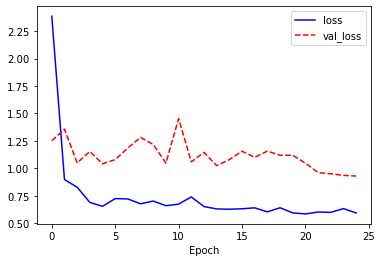

In [7]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

#### 회귀모델 평가(evaluation)
* 실제 테스트 데이터를 입력해서 모델을 평가한다.

In [8]:
model.evaluate(test_X, test_Y)

102/102 [==============================] - 0s 117us/sample - loss: 0.6477


0.6477219848071828

#### 실제 주택 가격과 예측 주택 가격 시각화
* 실제 주택 가격(test_Y)와 예측 주택 가격(pred_Y)는 비교적 일정한 값에 머물러 있는 형태 
* 이상적이라면 그래프의 대각선에 모든 점이 위치해야 됨 
* val_loss 가 높지 않으려면 과적합(overfitting)을 막아야 한다. 

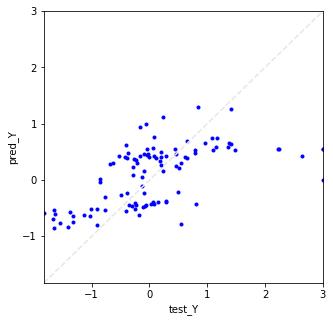

In [9]:
pred_Y = model.predict(test_X)

# 실제값과 예측값 출력 
plt.figure(figsize=(5, 5))
plt.plot(test_Y, pred_Y, 'b.')
plt.axis([min(test_Y), max(test_Y), min(test_Y), max(test_Y)])

# y = x 대각선 
plt.plot([min(test_Y), max(test_Y)], [min(test_Y), max(test_Y)], ls='--', c='.9') # c : 색 강도
plt.xlabel('test_Y')
plt.ylabel('pred_Y')
plt.show()

#### 모델 재정의 및 학습
* 과적합을 막는 방법중에 하나는 위에 작성된 그래프를 확인하고 에폭을 조절해서 수정하면 된다. 
* callbacks.EarlyStopping : 학습 도중에 끼어들기 위해 콜백(callback) 함수를 사용한다.
* 콜백 함수는 모델을 학습할 때 에폭이 끝날 때마다 호출된다. --> 네트워크가 과적합되지 않도록 도중에 학습을 멈춤.
* callbacks 인수를 통해 호출 
* patience : 몇 번의 에폭을 기준으로 삼을 것인지 설정 
* monitor : 어떤 값을 지켜볼 것인지 설정 

In [10]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=52, activation='relu', input_shape=(13,)),
    tf.keras.layers.Dense(units=39, activation='relu'),
    tf.keras.layers.Dense(units=26, activation='relu'),
    tf.keras.layers.Dense(units=1)
])

model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.07), loss='mse')

history = model.fit(train_X, train_Y, epochs=25, batch_size=32, validation_split=0.25, 
                   callbacks=[tf.keras.callbacks.EarlyStopping(patience=3, monitor='val_loss')])

Train on 303 samples, validate on 101 samples
Epoch 1/25
303/303 [==============================] - 0s 853us/sample - loss: 6.1178 - val_loss: 1.1787
Epoch 2/25
303/303 [==============================] - 0s 95us/sample - loss: 0.9371 - val_loss: 1.1576
Epoch 3/25
303/303 [==============================] - 0s 89us/sample - loss: 0.9348 - val_loss: 1.2686
Epoch 4/25
303/303 [==============================] - 0s 95us/sample - loss: 0.8151 - val_loss: 1.2698
Epoch 5/25
303/303 [==============================] - 0s 92us/sample - loss: 0.7296 - val_loss: 1.1617


#### 그래프로 확인 

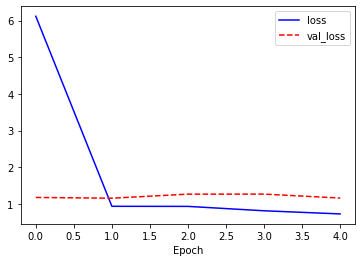

In [11]:
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

#### 평가

In [12]:
model.evaluate(test_X, test_Y)

102/102 [==============================] - 0s 88us/sample - loss: 0.7329


0.7328545743343877

#### 주택가격 확인 

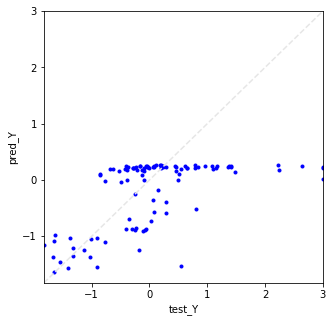

In [13]:
pred_Y = model.predict(test_X)

# 실제값과 예측값 출력 
plt.figure(figsize=(5, 5))
plt.plot(test_Y, pred_Y, 'b.')
plt.axis([min(test_Y), max(test_Y), min(test_Y), max(test_Y)])

# y = x 대각선 
plt.plot([min(test_Y), max(test_Y)], [min(test_Y), max(test_Y)], ls='--', c='.9') # c : 색 강도
plt.xlabel('test_Y')
plt.ylabel('pred_Y')
plt.show()